In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.describe()

In [ ]:
df.info()

<AxesSubplot:xlabel='T2', ylabel='T6'>

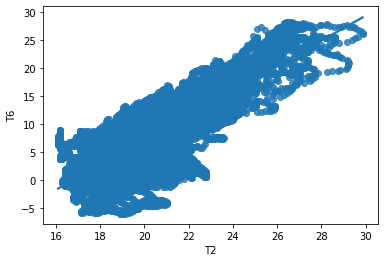

In [28]:
sns.regplot(x="T2", y="T6",data=df)

In [3]:
df = df.drop(columns= ['date', 'lights'])

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns= df.columns)
normalized_df = normalised_df.drop(columns =['Appliances'])
target_df = normalised_df['Appliances']

In [ ]:
#normalized_df= normalised_df.drop(columns =['Appliances'])

In [7]:
#Now, we split our dataset into the training and testing dataset. Recall that wehad earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(normalized_df,target_df,test_size=0.3, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)

LinearRegression()

In [9]:
predicted_values = linear_model.predict(x_test)

In [10]:
#Residual of squares
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

45.35

In [11]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)

0.05

In [12]:
#Root Mean Square Error (RMSE) 
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

In [13]:
#R-Squared/Coefficient of Determination
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2) 

0.15

In [14]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [29]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
print(linear_model_weights)
print(linear_model_weights.max())
print(linear_model_weights.min())

       Features  Linear_Model_Weight
0           rv1        -7.920800e+10
1          RH_2        -4.568602e-01
2         T_out        -3.219087e-01
3            T2        -2.363151e-01
4            T9        -1.899521e-01
5          RH_8        -1.576331e-01
6        RH_out        -7.765954e-02
7          RH_7        -4.455998e-02
8          RH_9        -3.980982e-02
9            T5        -1.564582e-02
10           T1        -3.281051e-03
11  Press_mm_hg         6.865117e-03
12           T7         1.029490e-02
13   Visibility         1.229919e-02
14         RH_5         1.600441e-02
15         RH_4         2.641767e-02
16           T4         2.900741e-02
17    Windspeed         2.920699e-02
18         RH_6         3.806579e-02
19         RH_3         9.603256e-02
20           T8         1.020032e-01
21    Tdewpoint         1.177851e-01
22           T6         2.364673e-01
23           T3         2.907420e-01
24         RH_1         5.535923e-01
25          rv2         7.920800e+10
F

In [16]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [17]:
#obtain predictions
predicted_values2 = ridge_reg.predict(x_test)
#predicted_values 

In [18]:
#Root Mean Square Error (RMSE) 
#from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values2))
round(rmse, 3)

0.088

In [19]:
#Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [27]:
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
lasso_count =lasso_weights_df['Lasso_weight'].value_counts()
lasso_count
print(lasso_weights_df)

       Features  Lasso_weight
0        RH_out     -0.049557
1          RH_8     -0.000110
2            T1      0.000000
3     Tdewpoint      0.000000
4    Visibility      0.000000
5   Press_mm_hg     -0.000000
6         T_out      0.000000
7          RH_9     -0.000000
8            T9     -0.000000
9            T8      0.000000
10         RH_7     -0.000000
11          rv1     -0.000000
12           T7     -0.000000
13           T6      0.000000
14         RH_5      0.000000
15           T5     -0.000000
16         RH_4      0.000000
17           T4     -0.000000
18         RH_3      0.000000
19           T3      0.000000
20         RH_2     -0.000000
21           T2      0.000000
22         RH_6     -0.000000
23          rv2     -0.000000
24    Windspeed      0.002912
25         RH_1      0.017880


In [21]:
#obtain predictions
predicted_values3 = lasso_reg.predict(x_test)
#predicted_values 

In [22]:
#Root Mean Square Error (RMSE) for LaSSO
#from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values3))
round(rmse, 3)

0.094